# Best Cities for Tech People in Canada, 2021 

## Introduction  
This project will be showing comparison and similarity analysis among the three cities in Canada with great career opportunities for tech people, helping people moving to Canada choose the right place to start their first career after landing in Canada.   
 
I plan to going to Canada with my boyfriend after graduating from college in the U.S. Since I studied Information Systems for undergrad, I am looking for a city with great concentration of tech companies, which comes with larger demand in technical jobs, or a city will higher average salary for entry-level technical jobs, such as Business System Analysts and Software Developers, etc, so that I can get paid more to support my family, or a city that generate higher growth on economy, so that I can get better opportunities in various industries and get higher salary in the future. 

**Therefore, cities will be ranked based on the following three weighted criteria, and be choosen for neighborhood comparison**:
1. Growth of GDP (30%)
2. Concentration of Tech Companies (30%)
3. Average Salary for Entry-Level Software Developer and Business Analyst (40%)

I hope this report will help people making similar career decisions like me to choose the very first city to land their career at. 

## Data Understanding

The data set came from different source including **Wikipedia**, for the complete list of cities, technology companies in Canada, **Statista**, and **Foursquare**, for exploring venues around each neighborhood. The datasets will be cleaned into usable data before used in the analysis. For exmaple, I will move the missing values and "not assigned" out of the database and make proper accomendates to the dataset.

- *List of technology companies in Canada:*
https://en.wikipedia.org/wiki/Category:Technology_companies_of_Canada  
- *List of Canadian provinces and territories by gross domestic product:* https://en.wikipedia.org/wiki/List_of_Canadian_provinces_and_territories_by_gross_domestic_product
- *Average salary for tech:*
https://www.statista.com/statistics/730764/canadian-it-professionals-salary-provinces/

In [119]:
#gether data for the three criteria
#1st data set starts
import requests
website_url_tech = requests.get("https://en.wikipedia.org/wiki/List_of_companies_of_Canada").text

In [129]:
from bs4 import BeautifulSoup
soup_tech = BeautifulSoup(website_url_tech,'lxml')

My_table_tech = soup_tech.findAll('table')[1]

In [152]:
contents = My_table_tech.findAll('td')
thedata = []
for content in contents:
    thedata.append(content.text)

In [153]:
Names = []
Industries = []
Sectors = []
Headquarters = []
Foundeds = []
Notes = []

for data in thedata:
    if data == None:
        data = "None"
    if thedata.index(data) % 6 == 0:
        Names.append(data)
    elif thedata.index(data) % 6 == 1:
        Industries.append(data)
    elif thedata.index(data) % 6 == 2:
        Sectors.append(data)
    elif thedata.index(data) % 6 == 3:
        Headquarters.append(data)
    elif thedata.index(data) % 6 == 4:
        Foundeds.append(data)
    else:
        Notes.append(data)

In [154]:
Names = [x[:-1] for x in Names]
Industries = [x[:-1] for x in Industries]
Sectors = [x[:-1] for x in Sectors]
Headquarters = [x[:-1] for x in Headquarters]
Foundeds = [x[:-1] for x in Foundeds]
Notes = [x[:-1] for x in Notes]

In [155]:
import pandas as pd
df = pd.DataFrame()
df['Name']=Names[:499]
df['Industry']=Industries[:499]
df['Sector']=Sectors[:499]
df['Headquarter']=Headquarters[:499]
df['Founded']=Foundeds[:499]
df['Note']=Notes[:499]

In [156]:
df_tech = df[df['Industry'].str.contains("Technology", case=False, na=False)]


In [208]:
df_bycity = df_tech.groupby('Headquarter').count()
df_bycity = df_bycity.drop(["Industry", "Sector","Founded","Note"], axis=1)
df_bycity = df_bycity.rename(columns={"Name": "Number"})
df_bycity = df_bycity.sort_values(by=['Number'], ascending=False)
df_bycity.head()
#1st data set ready

,Number
Headquarter,
Toronto,10
Burnaby,5
Vancouver,5
Montreal,4
Richmond,3


In [209]:
# The code was removed by Watson Studio for sharing.

,Cities,2016,2021,Salary,GrowthRate
0,Toronto,329678,376577,66628,0.142257
1,Montréal,169931,188438,60109,0.108909
2,Vancouver,129158,145892,63825,0.129562
3,Calgary,113151,129953,64457,0.148492
4,Edmonton,84382,96107,53714,0.138951


In [210]:
df_bycity['Cities'] = df_bycity.index

In [211]:
#Create the whole data set
df_result = pd.merge(df_bycity, df_gdp, on=['Cities'], how='outer')
df_result.head()
#clean data ready for comparison

,Number,Cities,2016,2021,Salary,GrowthRate
0,10.0,Toronto,329678.0,376577.0,66628.0,0.142257
1,5.0,Burnaby,NaN,NaN,NaN,NaN
2,5.0,Vancouver,129158.0,145892.0,63825.0,0.129562
3,4.0,Montreal,NaN,NaN,NaN,NaN
4,3.0,Richmond,NaN,NaN,NaN,NaN


## Methodology   
Canadian cities will first be compared based on their three factors. Then the top three cities that are best for tech people to live at will be compared on their neighborhoods.
- **Bar Charts** --> compare tech companies distribution, GDP growth, and salary level for tech people for all cities in Canada
- **Folium** --> Graph maps that visualize the distribution of different venue groups in the top three Canadian cities for tech people
- **K-Mean** --> sort neighborhoods based on their venue categories

In [212]:
import matplotlib.pyplot as plt

### See the three index in charts

#### G1: Tech Companies Distribution in Canada

Text(0.5, 1.0, 'Tech Companies Distribution in Canada')

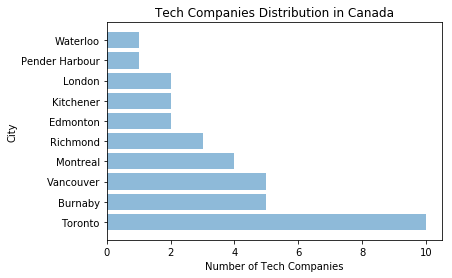

In [213]:
plt.barh(df_bycity.head(10).index, df_bycity.head(10)['Number'], align='center', alpha=0.5)
plt.xlabel('Number of Tech Companies')
plt.ylabel('City')
plt.title('Tech Companies Distribution in Canada')

#### G2: GDP Growth Comparison in Canadian Cities

Text(0.5, 1.0, 'GDP Growth Comparison in Canadian Cities')

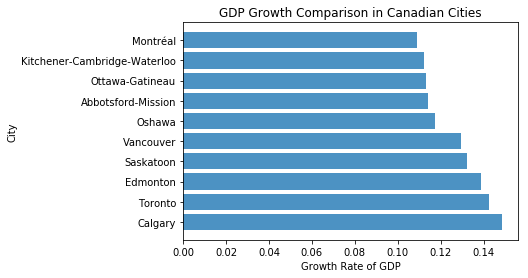

In [214]:
df_gdp = df_gdp.sort_values(by=['GrowthRate'], ascending=False)
plt.barh(df_gdp.head(10)["Cities"], df_gdp.head(10)['GrowthRate'], align='center', alpha=0.8)
plt.xlabel('Growth Rate of GDP')
plt.ylabel('City')
plt.title('GDP Growth Comparison in Canadian Cities')

#### G3: Salary(CAD) in Cities of Canada

Text(0.5, 1.0, 'Salary(CAD) in Cities of Canada')

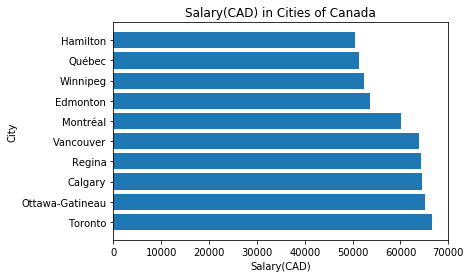

In [215]:
df_gdp = df_gdp.sort_values(by=['Salary'], ascending=False)
plt.barh(df_gdp.head(10)["Cities"], df_gdp.head(10)['Salary'], align='center', alpha=1)
plt.xlabel('Salary(CAD)')
plt.ylabel('City')
plt.title('Salary(CAD) in Cities of Canada')

### Choose the Top Three Cities

In [237]:
maxNumber = df_result['Number'].max()
maxSalary = df_result['Salary'].max()
maxGrowthRate = df_result['GrowthRate'].max()
df_new = df_result
df_new['Number'] = df_new['Number']/maxNumber
df_new['Salary'] = df_new['Salary']/maxSalary
df_new['GrowthRate'] = df_new['GrowthRate']/maxGrowthRate

df_new['Number']= df_new["Number"].fillna(0)
df_new['Salary']= df_new["Salary"].fillna(0)
df_new['GrowthRate']= df_new["GrowthRate"].fillna(0)

df_new['TotalIndex'] = df_new['Number'] + df_new['Salary'] + df_new['GrowthRate']
df_new = df_new.sort_values(by=['TotalIndex'], ascending=False)
df_new.head()

,Number,Cities,2016,2021,Salary,GrowthRate,TotalIndex
0,1.0,Toronto,329678.0,376577.0,1.000000,0.958012,2.958012
2,0.5,Vancouver,129158.0,145892.0,0.957931,0.872521,2.330452
16,0.1,Calgary,113151.0,129953.0,0.967416,1.000000,2.067416
5,0.2,Edmonton,84382.0,96107.0,0.806178,0.935751,1.941929
25,0.0,Ottawa-Gatineau,66435.0,73941.0,0.977862,0.760868,1.738730


#### *Based on the chart above, my first finding is that the top three cities in Canada for tech people to live in are Toronto, Vancouver, and Calgary.

### Explore Neighborhoods in the city

#### Toronto

In [257]:
website_url_nei = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M").text
soup_nei = BeautifulSoup(website_url_nei,'lxml')

My_table = soup_nei.findAll('table')[0]
links = My_table.findAll('td')
Neighborhoods = []
for link in links:
    Neighborhoods.append(link.get('title'))

In [274]:
contents = My_table.findAll('td')
thedata = []
for content in contents:
    thedata.append(content.text)

Postcodes = []
Boroughs = []
Neighbourhoods = []

for data in thedata:
    if thedata.index(data) % 3 == 0:
        Postcodes.append(data)
    elif thedata.index(data) % 3 == 1:
        Boroughs.append(data)
    else:
        Neighbourhoods.append(data)
Neighbourhoods = [x[:-1] for x in Neighbourhoods]
Postcodes = [x[:-1] for x in Postcodes]
Boroughs = [x[:-1] for x in Boroughs]

In [290]:
df_nei = pd.DataFrame()
df_nei['Postcode']=Postcodes[:179]
df_nei['Borough']=Boroughs[:179]
df_nei['Neighborhood']=Neighbourhoods[:179]

df_nei = df_nei[df_nei.Borough != 'Not assigned']
df_nei['Neighborhood']= df_nei['Neighborhood'].replace("Not assigne", df_nei['Borough']) 
#combine neighborhoods within the same borough
df_nei = df_nei.groupby('Postcode', as_index=False).agg({'Neighborhood' : ', '.join, 'Borough' : 'first'})  
df_nei = df_nei[['Postcode', 'Borough', 'Neighborhood']]

co = pd.read_csv('http://cocl.us/Geospatial_data')
df_nei = df_nei.join(co.set_index('Postal Code'), on='Postcode')
#Toronto Neighborhood Analysis
df_toronto = df_nei[df_nei['Borough'].str.contains("Toronto", case=False, na=False)]
df_toronto['Latitude']= df_toronto["Latitude"].fillna(0)
df_toronto['Longitude']= df_toronto["Longitude"].fillna(0)
df_toronto.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Postcode,Borough,Neighborhood,Latitude,Longitude
40,M4E,East Toronto,The Beaches,43.676357,-79.293031
48,M5A,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636
49,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
50,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
51,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


In [291]:
import json # library to handle JSON files

!pip install geopy
import geopy

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [292]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#import folium # map rendering library

In [293]:
address = 'Toronto'

geolocator = Nominatim(user_agent="trt_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[43.6534817, -79.3839347], zoom_start=13)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Borough'], df_toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        parse_html=False).add_to(map_toronto)  
    

map_toronto

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


#### Vancouver

In [ ]:
website_url_nei = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_V").text
soup_nei = BeautifulSoup(website_url_nei,'lxml')

My_table = soup_nei.findAll('table')[0]
links = My_table.findAll('td')
Neighborhoods = []
for link in links:
    Neighborhoods.append(link.get('title'))

In [ ]:
contents = My_table.findAll('td')
thedata = []
for content in contents:
    thedata.append(content.text)

Postcodes = []
Boroughs = []
Neighbourhoods = []

for data in thedata:
    if thedata.index(data) % 3 == 0:
        Postcodes.append(data)
    elif thedata.index(data) % 3 == 1:
        Boroughs.append(data)
    else:
        Neighbourhoods.append(data)
Neighbourhoods = [x[:-1] for x in Neighbourhoods]
Postcodes = [x[:-1] for x in Postcodes]
Boroughs = [x[:-1] for x in Boroughs]

In [ ]:
df_nei = pd.DataFrame()
df_nei['Postcode']=Postcodes[:179]
df_nei['Borough']=Boroughs[:179]
df_nei['Neighborhood']=Neighbourhoods[:179]

df_nei = df_nei[df_nei.Borough != 'Not assigned']
df_nei['Neighborhood']= df_nei['Neighborhood'].replace("Not assigne", df_nei['Borough']) 
#combine neighborhoods within the same borough
df_nei = df_nei.groupby('Postcode', as_index=False).agg({'Neighborhood' : ', '.join, 'Borough' : 'first'})  
df_nei = df_nei[['Postcode', 'Borough', 'Neighborhood']]

co = pd.read_csv('http://cocl.us/Geospatial_data')
df_nei = df_nei.join(co.set_index('Postal Code'), on='Postcode')
#Toronto Neighborhood Analysis
df_van = df_nei[df_nei['Borough'].str.contains("Vancouver", case=False, na=False)]
df_van['Latitude']= df_van["Latitude"].fillna(0)
df_van['Longitude']= df_van["Longitude"].fillna(0)

In [ ]:
address = 'Toronto'

geolocator = Nominatim(user_agent="trt_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Vancouver are {}, {}.'.format(latitude, longitude))

# create map of Toronto using latitude and longitude values
map_vancouver = folium.Map(location=[43.6534817, -79.3839347], zoom_start=13)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_toronto['Latitude'], df_van['Longitude'], df_van['Borough'], df_van['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        parse_html=False).add_to(map_vancouver)  

map_vancouver

#### Calgary

In [ ]:
website_url_nei = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_S").text
soup_nei = BeautifulSoup(website_url_nei,'lxml')

My_table = soup_nei.findAll('table')[0]
links = My_table.findAll('td')
Neighborhoods = []
for link in links:
    Neighborhoods.append(link.get('title'))

In [ ]:
contents = My_table.findAll('td')
thedata = []
for content in contents:
    thedata.append(content.text)

Postcodes = []
Boroughs = []
Neighbourhoods = []

for data in thedata:
    if thedata.index(data) % 3 == 0:
        Postcodes.append(data)
    elif thedata.index(data) % 3 == 1:
        Boroughs.append(data)
    else:
        Neighbourhoods.append(data)
Neighbourhoods = [x[:-1] for x in Neighbourhoods]
Postcodes = [x[:-1] for x in Postcodes]
Boroughs = [x[:-1] for x in Boroughs]

In [ ]:
df_nei = pd.DataFrame()
df_nei['Postcode']=Postcodes[:179]
df_nei['Borough']=Boroughs[:179]
df_nei['Neighborhood']=Neighbourhoods[:179]

df_nei = df_nei[df_nei.Borough != 'Not assigned']
df_nei['Neighborhood']= df_nei['Neighborhood'].replace("Not assigne", df_nei['Borough']) 
#combine neighborhoods within the same borough
df_nei = df_nei.groupby('Postcode', as_index=False).agg({'Neighborhood' : ', '.join, 'Borough' : 'first'})  
df_nei = df_nei[['Postcode', 'Borough', 'Neighborhood']]

co = pd.read_csv('http://cocl.us/Geospatial_data')
df_nei = df_nei.join(co.set_index('Postal Code'), on='Postcode')
#Toronto Neighborhood Analysis
df_cal = df_nei[df_nei['Borough'].str.contains("Calary", case=False, na=False)]
df_cal['Latitude']= df_cal["Latitude"].fillna(0)
df_cal['Longitude']= df_cal["Longitude"].fillna(0)

In [ ]:
address = 'Calary'

geolocator = Nominatim(user_agent="trt_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Calary are {}, {}.'.format(latitude, longitude))

# create map of Toronto using latitude and longitude values
map_calgary = folium.Map(location=[43.6534817, -79.3839347], zoom_start=13)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_toronto['Latitude'], df_cal['Longitude'], df_cal['Borough'], df_cal['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        parse_html=False).add_to(map_calgary)  

map_calgary

## Result

The cities that are compared and choosen based on the three valued factors for tech people to live in are Toronto, Vancouver, and Calgary. After comparing their neighborhoods, I found that Toronto's neighborhood are more concrete in the downtown area and spead-out for the outer neighborhood, while vancouver's neighborhood is more compact with different neighborhoods serving different functionalities. That probably is due to the coastal location of Vancouver. Without much room to spread out or to be wasted. The neighborhood of Calgary is clearly centered in the middle of the city and spead out based on the eight compass directions. 

## Discussion

Based on the data, even these three cities are chosen for final comparison, there are still some variation among them. Since this report is public and aims to help more tech people interesting in working in Canada on choosing there landing city, personal preference will be taken into consideration.

Toronto is ranked first place both in tech company distribution and salary, and 2nd in GDP growth. Vancouver is ranked third place for tech company distribution and fifth place for both GDP growth and salary level. Toronto may be the best choice overall for the next three years if you are interesting in moving to a big city and try to start your first job in Canada. Cities like Calgary and Edmonton weren't not chosen as technology center, however, with repid growth on GDP, other industries will later enhance its tech power building. Although Ottawa is the capital, its technology strength may not as powerful as its political sytsem. But with high salary-paid power, it may also fill your demand to start on a more than entry-level job and earn a relatively higher-paid and consistent salary. 

## Conclusion

This report was intented to help people like me to decide on the first city in Canada to start their career in. Under the comparison based on technology company distribution, salary level for tech jobs, and GDP growth, using bar charts, Toronto, Vancouver, and Calgary are chosen for the answer. Neighborhoods for these three cities are compared using Folium. Based on your preference of cities and the level of compactness, you can make your own choice of city to start career with based this analysis. This report would later be furnished with living cost to present the real spending power and living quality of each city. There is never a best place, but you can choose what life you want to live with. 